# Exploratory Data Analysis On Electric Vehicle Population

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021.0,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,199194831,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
143592,2C4RC1S76N,King,Clyde Hill,WA,98004.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,48.0,193853824,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
143593,1G1FZ6S02L,King,Seattle,WA,98104.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,43.0,205856339,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
143594,1G1RD6E40E,Spokane,Spokane,WA,99208.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6.0,346114492,POINT (-117.40724999999998 47.71862500000003),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


## Data preparation & cleaning

In [3]:
len(df.columns)

17

In [4]:
df.shape

(143596, 17)

In [5]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143574 non-null  float64
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

In [7]:
df.rename(columns = {'VIN (1-10)':'Vehicle Identification Number'}, inplace = True)

In [8]:
df

,Vehicle Identification Number,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312.0,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021.0,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,199194831,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
143592,2C4RC1S76N,King,Clyde Hill,WA,98004.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,48.0,193853824,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
143593,1G1FZ6S02L,King,Seattle,WA,98104.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,43.0,205856339,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
143594,1G1RD6E40E,Spokane,Spokane,WA,99208.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6.0,346114492,POINT (-117.40724999999998 47.71862500000003),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [9]:
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

In [10]:
df

,Vehicle Identification Number,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41.0,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,199194831,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
143592,2C4RC1S76N,King,Clyde Hill,WA,98004,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,48.0,193853824,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
143593,1G1FZ6S02L,King,Seattle,WA,98104,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,43.0,205856339,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
143594,1G1RD6E40E,Spokane,Spokane,WA,99208,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6.0,346114492,POINT (-117.40724999999998 47.71862500000003),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143596 entries, 0 to 143595
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Vehicle Identification Number                      143596 non-null  object 
 1   County                                             143574 non-null  object 
 2   City                                               143574 non-null  object 
 3   State                                              143596 non-null  object 
 4   Postal Code                                        143596 non-null  int64  
 5   Model Year                                         143596 non-null  int64  
 6   Make                                               143596 non-null  object 
 7   Model                                              143596 non-null  object 
 8   Electric Vehicle Type                              143596 non-null  object

In [12]:
df['Legislative District'] = df['Legislative District'].fillna(0).astype(int)

In [13]:
df

,Vehicle Identification Number,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10
2,1G1FW6S03J,King,Seattle,WA,98117,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36,168549727,POINT (-122.37275999999997 47.689685000000054),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJSA1AC0D,King,Newcastle,WA,98059,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41,244891062,POINT (-122.15733999999998 47.487175000000036),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1FADP5CU8F,Kitsap,Bremerton,WA,98312,2015,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26,134915000,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143591,WA1AAAGE1N,Snohomish,Bothell,WA,98021,2022,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,199194831,POINT (-122.17945799999995 47.80258900000007),PUGET SOUND ENERGY INC,5.306105e+10
143592,2C4RC1S76N,King,Clyde Hill,WA,98004,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,48,193853824,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
143593,1G1FZ6S02L,King,Seattle,WA,98104,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,43,205856339,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
143594,1G1RD6E40E,Spokane,Spokane,WA,99208,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6,346114492,POINT (-117.40724999999998 47.71862500000003),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


###  DOL Vehicle ID is a unique identifier for each vehicle. Therefore, we will remove the duplicate IDs from the dataset using drop_duplicates method of Pandas:

In [14]:
df['DOL Vehicle ID'].value_counts().value_counts()

count
1    143596
Name: count, dtype: int64

#### There is no duplicate IDs in dataset

## To view the statistical values of numerical columns

In [15]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,143596.000000,143596.000000,143596.000000,143596.000000,143596.000000,1.435960e+05,1.435740e+05
mean,98160.171634,2019.865574,70.495738,1373.386515,29.304862,2.092015e+08,5.297590e+10
std,2674.898279,3.016004,97.128735,9450.067747,14.873051,8.353700e+07,1.594040e+09
min,0.000000,1997.000000,0.000000,0.000000,0.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.668338e+08,5.303301e+10
50%,98122.000000,2021.000000,19.000000,0.000000,33.000000,2.111039e+08,5.303303e+10
75%,98370.000000,2022.000000,111.000000,0.000000,43.000000,2.364520e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


## Handling the missing values

In [16]:
df.isna().sum()

Vehicle Identification Number                         0
County                                               22
City                                                 22
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                     25
Electric Utility                                     22
2020 Census Tract                                    22
dtype: int64

## Visualization

In [17]:
cities_by_Electric_Range=df.City.value_counts()
cities_by_Electric_Range

City
Seattle          24662
Bellevue          7376
Redmond           5245
Vancouver         5045
Bothell           4599
                 ...  
Kailua Kona          1
Copalis Beach        1
Sarasota             1
Conyers              1
La Vernia            1
Name: count, Length: 655, dtype: int64

In [18]:
cities_by_Electric_Range[:20]

City
Seattle          24662
Bellevue          7376
Redmond           5245
Vancouver         5045
Bothell           4599
Kirkland          4455
Sammamish         4199
Renton            3744
Olympia           3396
Tacoma            2975
Bellingham        2436
Issaquah          2243
Spokane           2121
Kent              2100
Lynnwood          2056
Mercer Island     2011
Tukwila           2002
Woodinville       1956
Everett           1939
Snohomish         1669
Name: count, dtype: int64

## To plot the cities by the Electric Range upto range 20.

<Axes: ylabel='count'>

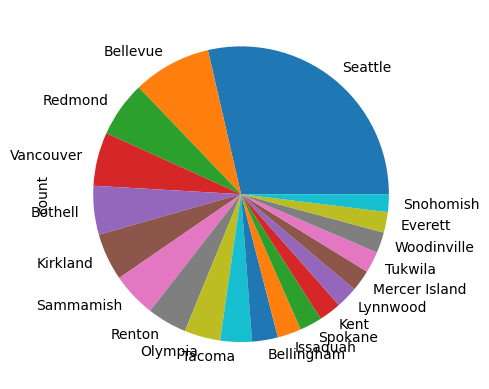

In [19]:
# To plot the cities by the Electric Range upto range 20
cities_by_Electric_Range[:20].plot(kind='pie')

#### From the above pie chart Seattle City has the more Electric Range

## Model

In [20]:
# to view the top models
top_Model=df.Model.value_counts().iloc[:10]
top_Model

Model
MODEL 3        26766
MODEL Y        26194
LEAF           13093
MODEL S         7542
BOLT EV         5599
MODEL X         5002
VOLT            4884
ID.4            2839
NIRO            2764
PRIUS PRIME     2506
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 highest maximum Models')

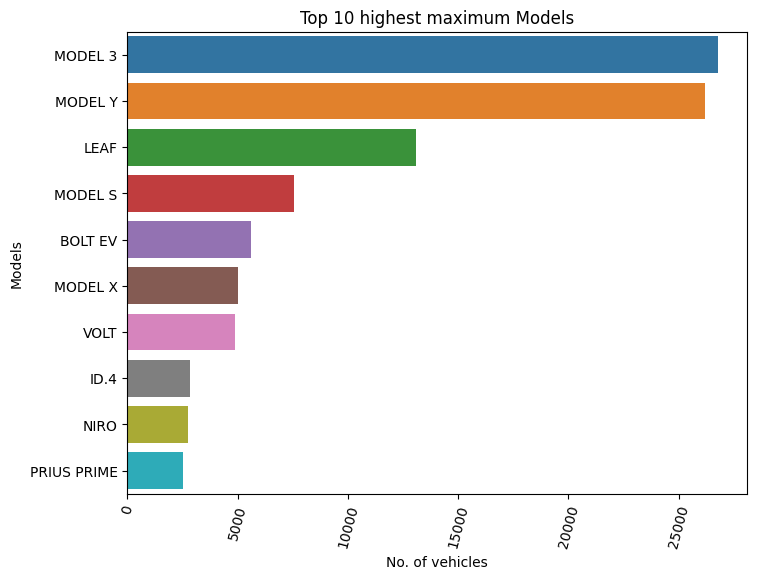

In [21]:
#  ploting the top models
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.barplot(y=top_Model.index,x=top_Model);
plt.xlabel( "No. of vehicles")

# Set label for y-axis
plt.ylabel( "Models" )

# Set title for figure
plt.title( "Top 10 highest maximum Models" )

#### From the above barplot highest number of vehicles are MODEL 3 

## Make

In [22]:
# to view the top makes
top_Make=(df.Make.value_counts()).iloc[:10]
top_Make

Make
TESLA         65552
NISSAN        13317
CHEVROLET     11816
FORD           7307
BMW            6209
KIA            5922
TOYOTA         5074
VOLKSWAGEN     3914
VOLVO          3415
JEEP           3084
Name: count, dtype: int64

<Axes: xlabel='Make'>

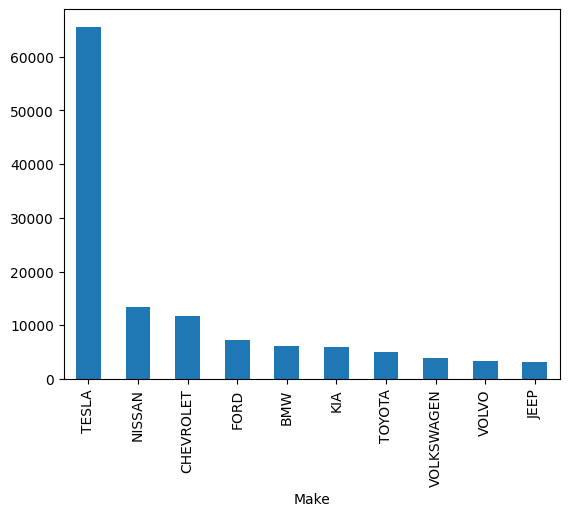

In [23]:
top_Make.plot(kind='bar')

#### TESLA is top make in all make with the count 65.552k and NISSAN is the second one with the count 13.317k.

## No. of EV per County

In [24]:
County_counts = pd.DataFrame(df.County.value_counts().reset_index())
County_counts.columns = ["County","counts"]
County_counts


,County,counts
0,King,75383
1,Snohomish,16429
2,Pierce,11017
3,Clark,8455
4,Thurston,5097
...,...,...
165,Kent,1
166,Berkeley,1
167,Napa,1
168,Rockdale,1


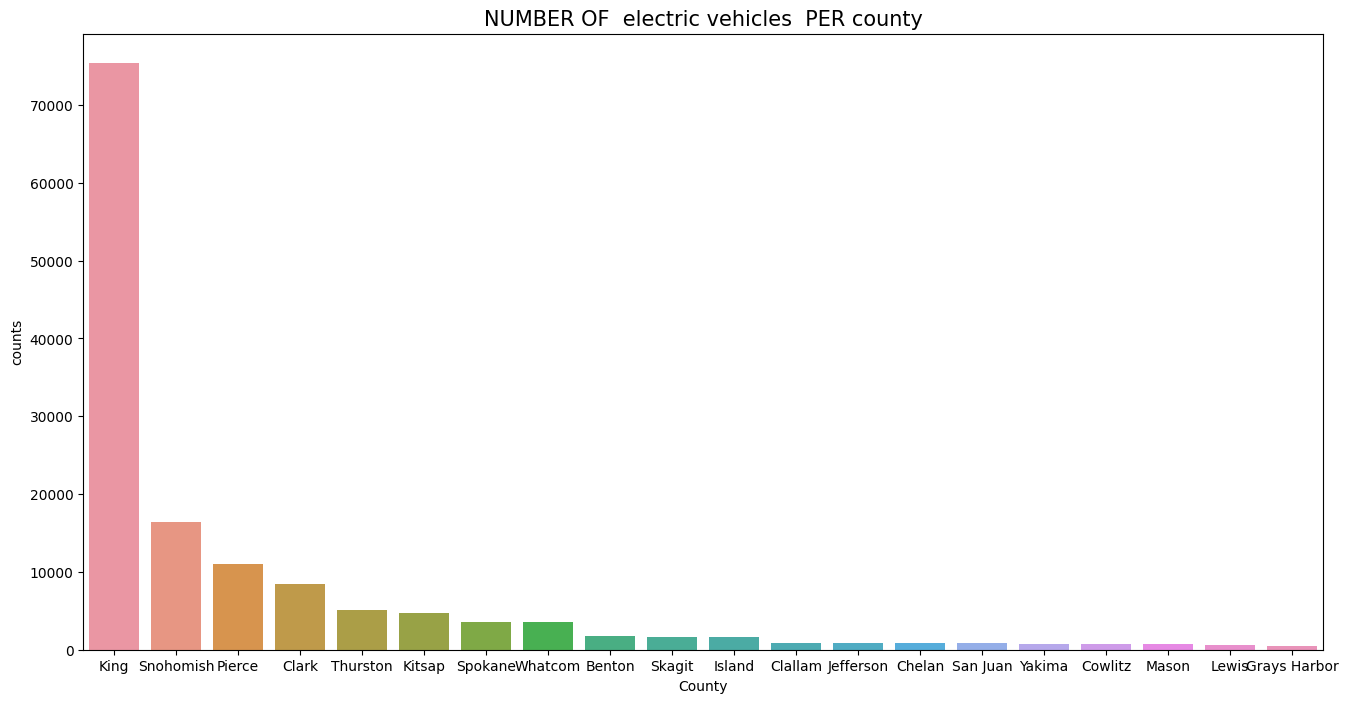

In [25]:
plt.figure(figsize=(16,8))
plt.title("NUMBER OF  electric vehicles  PER county", fontsize= 15)
sns.barplot(x = County_counts.County[:20], y = County_counts.counts, data = County_counts);

#### King county has the more number of Electric Vehicles and Harbor has the lowest number of Electric vehicles


## Electric Range per Clean Alternative Fuel Vehicle (CAFV) Eligibility

<Axes: xlabel='Electric Range', ylabel='Count'>

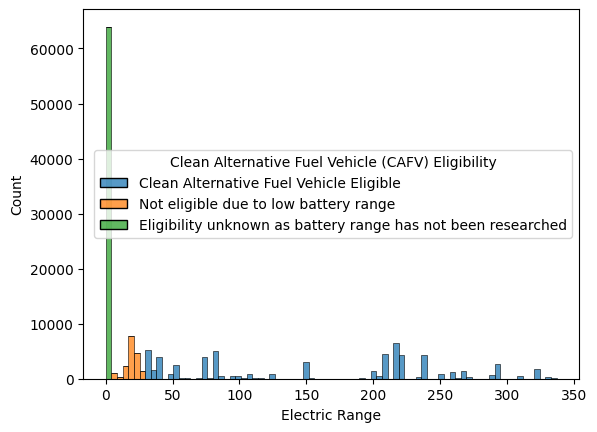

In [26]:
# To view the Electric Range per CAFV Eligibility
sns.histplot(data=df, x="Electric Range", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", multiple="stack")

#### It is noted that for electric ranges greater than 50 are eligible vehicles with clean fuel. The uncertainty lies in those ranges below 50 as they are either not eligible or there is no clear information on them.



## Relation Between Electric Range And Base MSRP

<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

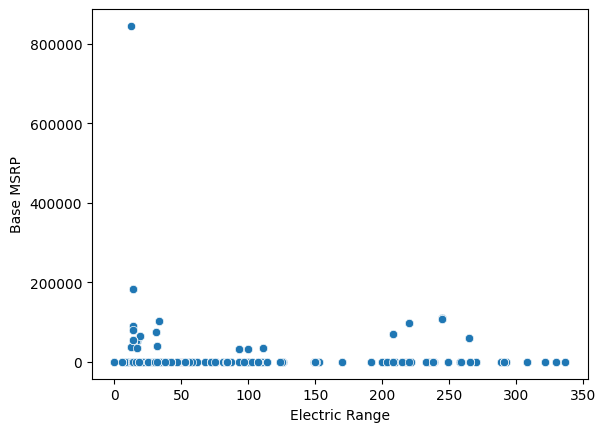

In [27]:
# To view the Relation between the Electric range and Base MSRP
sns.scatterplot(data=df, x="Electric Range", y="Base MSRP")

#### Here there is no relation between the Electric Range and Base MSRP"

## States with highest number of cars

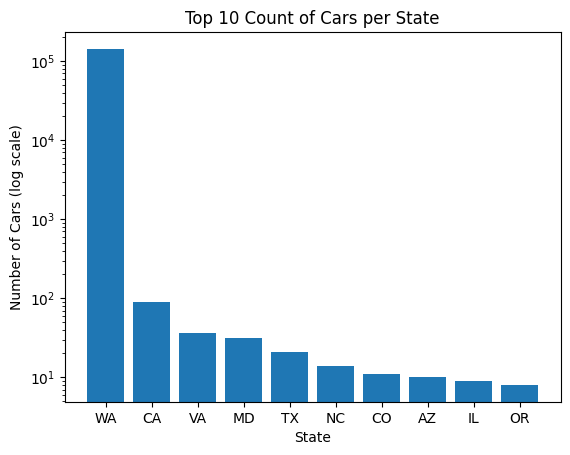

In [28]:
car_counts_St = df['State'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_St.index, car_counts_St.values)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars (log scale)')
plt.title('Top 10 Count of Cars per State')
plt.show()


In [29]:
car_counts_St

State
WA    143269
CA        90
VA        36
MD        31
TX        21
NC        14
CO        11
AZ        10
IL         9
OR         8
Name: count, dtype: int64

#### Washington has the highest number of cars

## Postal codes with highest number of cars

In [30]:
# To View the Top 10 count of cars per postal code
car_counts_pc = df['Postal Code'].value_counts().nlargest(10)
car_counts_pc

Postal Code
98052    3689
98012    2605
98033    2526
98004    2372
98006    2359
98115    2263
98074    2039
98072    2028
98040    2011
98034    1968
Name: count, dtype: int64

<Axes: xlabel='Postal Code'>

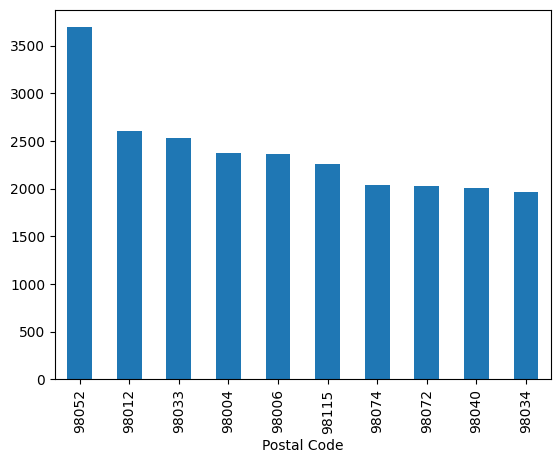

In [31]:
car_counts_pc.plot(kind='bar')

#### Postal code 98052 has the highest number of cars. This provide us more insight for other marketing purposes and upselling opportunities

## Number of cars in each year

In [32]:
value_counts = df['Model Year'].value_counts()
model_year_counts = pd.DataFrame(value_counts)
model_year_counts = model_year_counts.reset_index()
model_year_counts.columns = ['Model_year', 'counts'] # change column names
model_year_counts


,Model_year,counts
0,2023,30904
1,2022,27904
2,2021,18470
3,2018,14392
4,2020,11126
5,2019,10662
6,2017,8577
7,2016,5662
8,2015,4938
9,2013,4596


<Axes: xlabel='Model_year', ylabel='counts'>

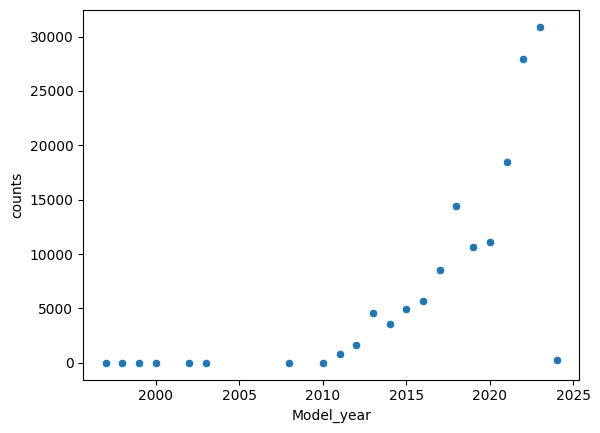

In [33]:
sns.scatterplot(data=model_year_counts, x="Model_year", y="counts")

##### Here from the scatter plot, after the year 2010 number of electric vehicles is increasing with year